<a href="https://colab.research.google.com/github/Punambhatt/Machine-Learning/blob/main/MomentumGD_BGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def quadratic_loss(x, y):
    return x**2 + 10 * y**2

In [3]:
def quadratic_grad(x, y):
    dx = 2 * x
    dy = 20 * y
    return np.array([dx, dy])

In [4]:
def batch_gradient_descent(grad_func, eta, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]

    for _ in range(epochs):
        grad = grad_func(x, y)
        x -= eta * grad[0]
        y -= eta * grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))

    return np.array(path), losses

In [38]:
def gradient_descent_momentum(grad_func, eta, beta, epochs, start_point):
    x, y = start_point
    v = np.array([0, 0])
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]

    for _ in range(epochs):
        grad = grad_func(x, y)
        v = beta * v + (1 - beta) * grad
        x -= eta * v[0]
        y -= eta * v[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))

    return np.array(path), losses

In [39]:
def plot_paths(function, paths, labels, title):
    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='jet')

    for path, label in zip(paths, labels):
        plt.plot(path[:, 0], path[:, 1], label=label)
        plt.scatter(path[0, 0], path[0, 1], color='green', marker='o', s=100, label="Start" if label == labels[0] else "")
        plt.scatter(path[-1, 0], path[-1, 1], color='red', marker='x', s=100, label="End" if label == labels[0] else "")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

In [40]:
def plot_losses(losses, labels, title):
    plt.figure(figsize=(8, 6))
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [41]:
eta_bgd = 0.1
eta_momentum = 0.1
beta = 0.9
epochs = 50
start_point = (1.5, 1.5)

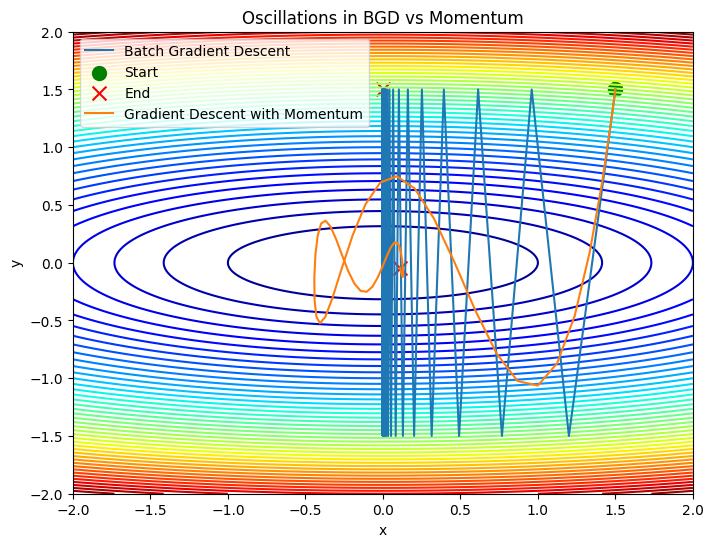

In [42]:
path_bgd, losses_bgd = batch_gradient_descent(quadratic_grad, eta_bgd, epochs, start_point)
path_momentum, losses_momentum = gradient_descent_momentum(quadratic_grad, eta_momentum, beta, epochs, start_point)

plot_paths(quadratic_loss, [path_bgd, path_momentum],["Batch Gradient Descent", "Gradient Descent with Momentum"],
           "Oscillations in BGD vs Momentum")